In [1]:
%matplotlib inline
from sklearn import linear_model
import scipy.stats
import os
import shutil
import re
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from Bio import SeqIO
from src import contig_stats
sns.set_style("whitegrid")

In [6]:
path = "/media/NGS/Sequences/Klebsiella_pneumoniae/NCBI"

In [7]:
def run(args):
    fasta, file = args
    id = re.sub(r".fna$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [8]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args))

In [9]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_002950135.1,5106737,5106737,5106737,5320147,2
1,GCA_002317935.1,109573,69164,34831,4759825,158
2,GCA_003977345.1,228637,90299,42420,5323736,182
3,GCA_001905975.1,48982,25808,13452,4258436,357
4,GCA_002247825.1,163080,97200,53339,4926749,151
5,GCA_000815685.1,252526,141339,60048,4864228,165
6,GCA_003877295.1,32417,19312,10929,4305682,452
7,GCA_002949955.1,4680268,4680268,4680268,4815589,2
8,GCA_001906185.1,33356,18647,9853,4291898,461
9,GCA_000815735.1,115044,55416,25141,4832830,335


# N25, N50, N75

Text(0, 0.5, 'number')

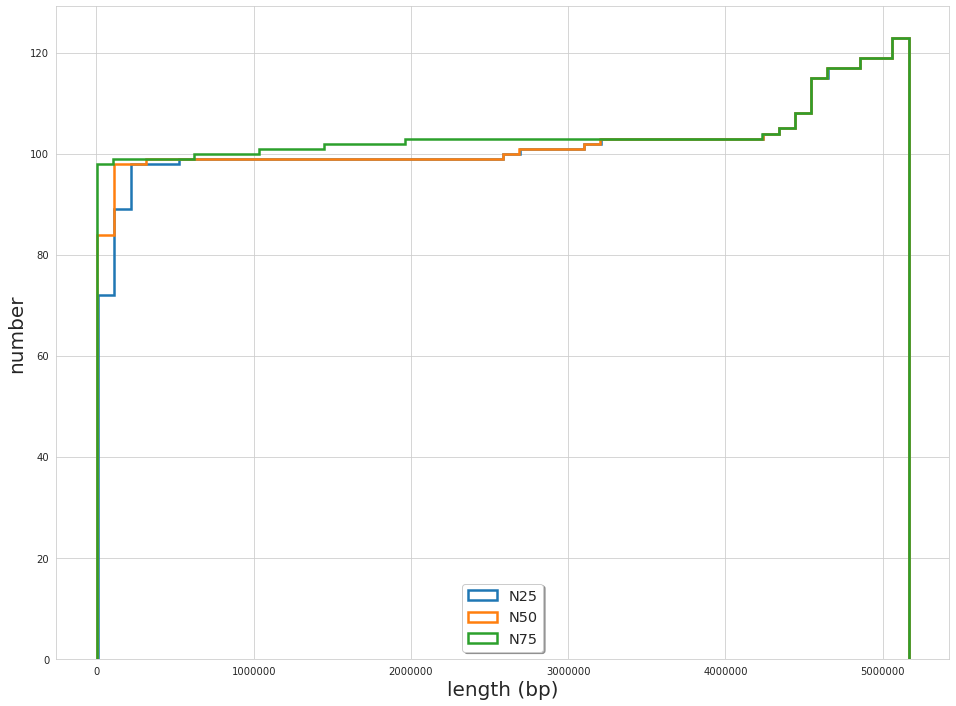

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
# plt.title("cumulative Klebsiella pneumoniae contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality.png")

Text(0, 0.5, 'number')

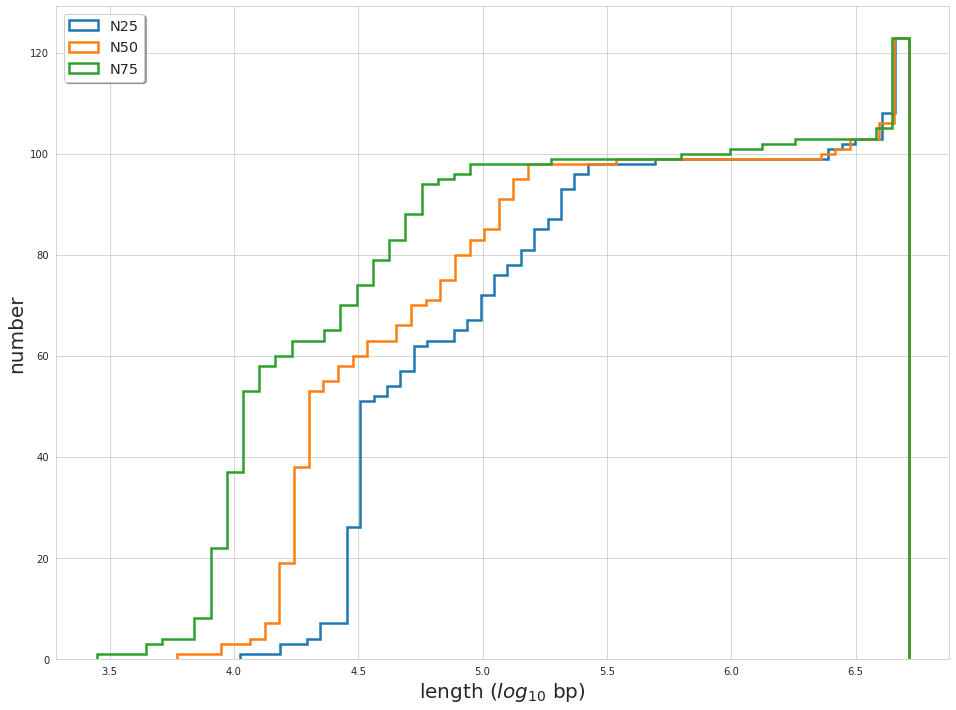

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
# plt.title("cumulative Klebsiella pneumoniae contigs N25, N50, N75", fontsize=28)
# plt.savefig("pics/cumulative Vibrio cholerae contigs quality log-scale.png")

# Counts

Text(0.5,1,'Genome contig number distribution')

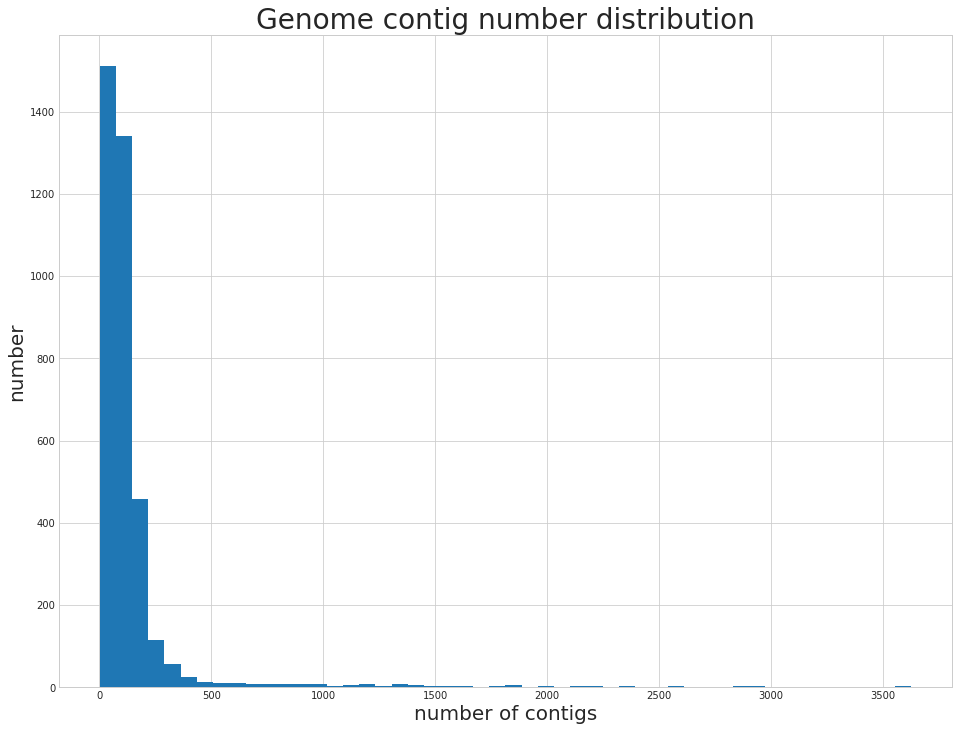

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution.png")

Text(0.5,1,'Genome contig number distribution (> 300)')

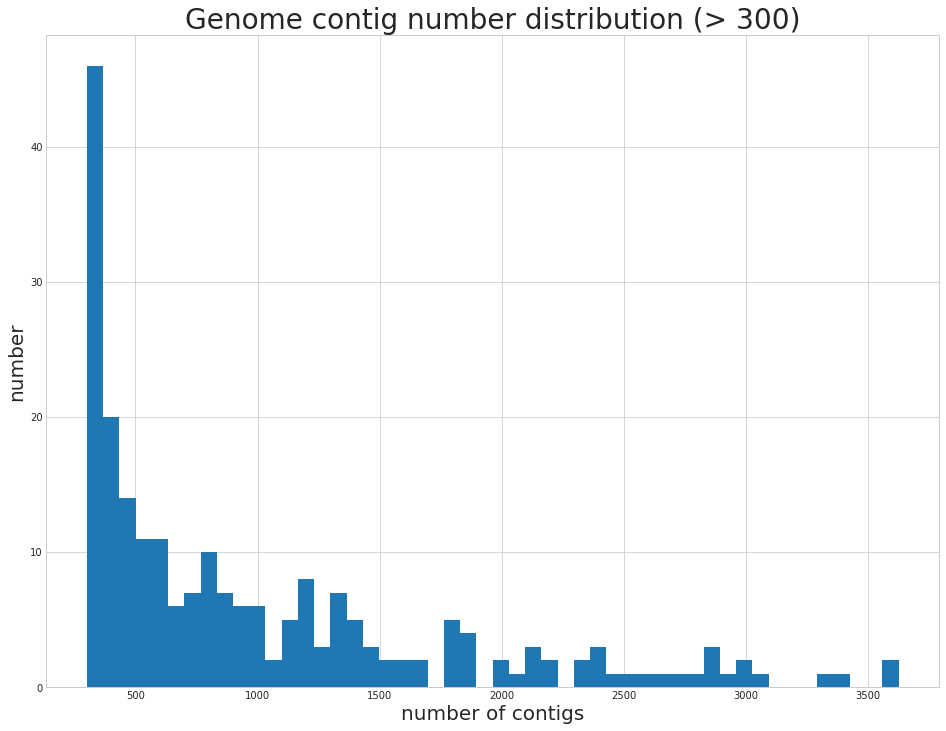

In [9]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 300]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 300)", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution larger 500.png")

Text(0.5,1,'Genome contig number distribution (<= 300)')

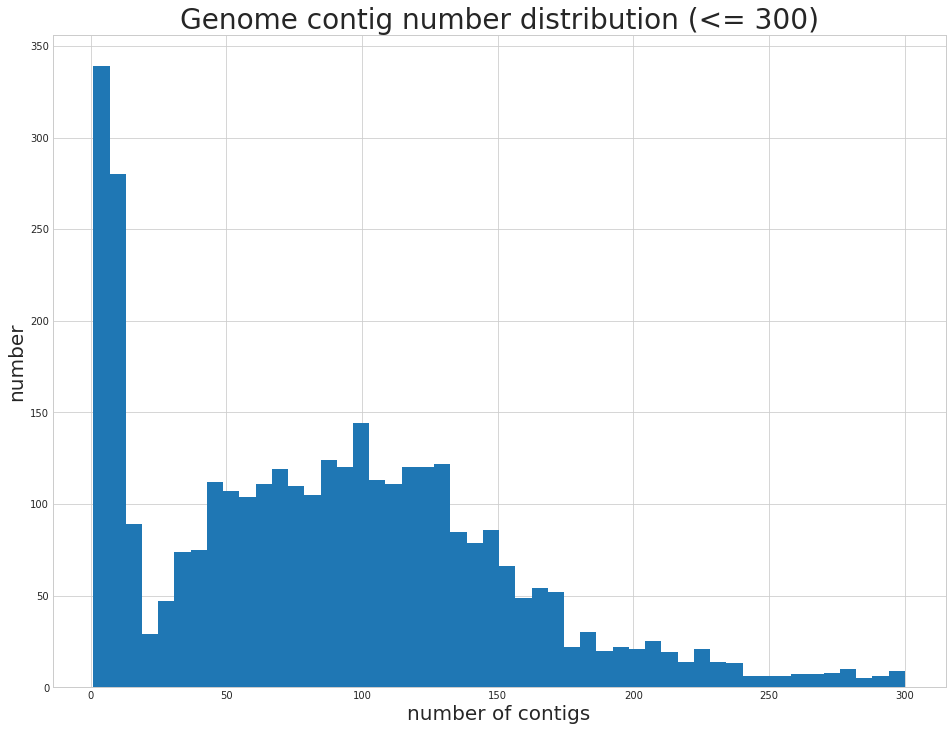

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 300]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 300)", fontsize=28)
# plt.savefig("pics/Vibrio cholerae genome contig number distribution lower 300.png")

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


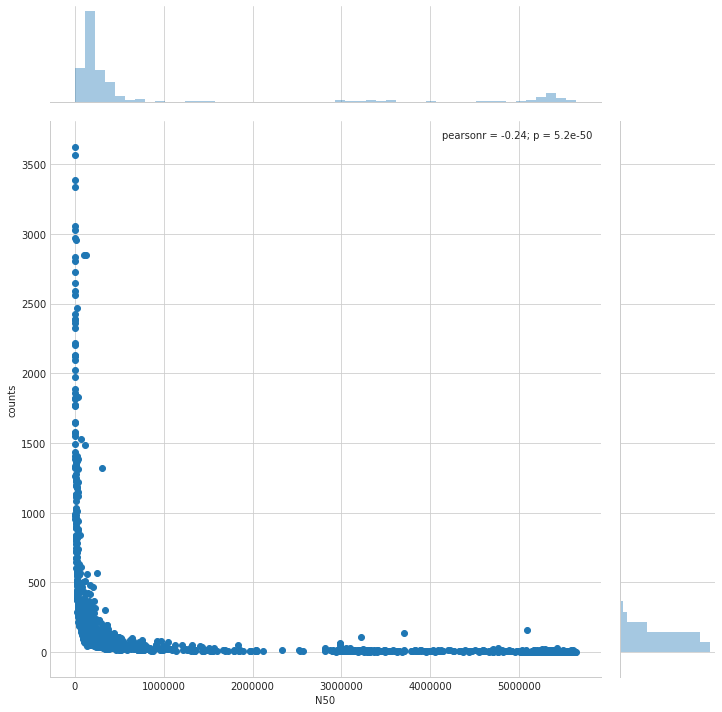

In [11]:
sns.jointplot(data=table, x="N50", y="counts", size=10)
# plt.savefig("pics/Salmonella enterica N50-count plot.png")

In [12]:
table["1/N50"] = 1/table["N50"]
table["1000/N50"] = table["1/N50"]*1000

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


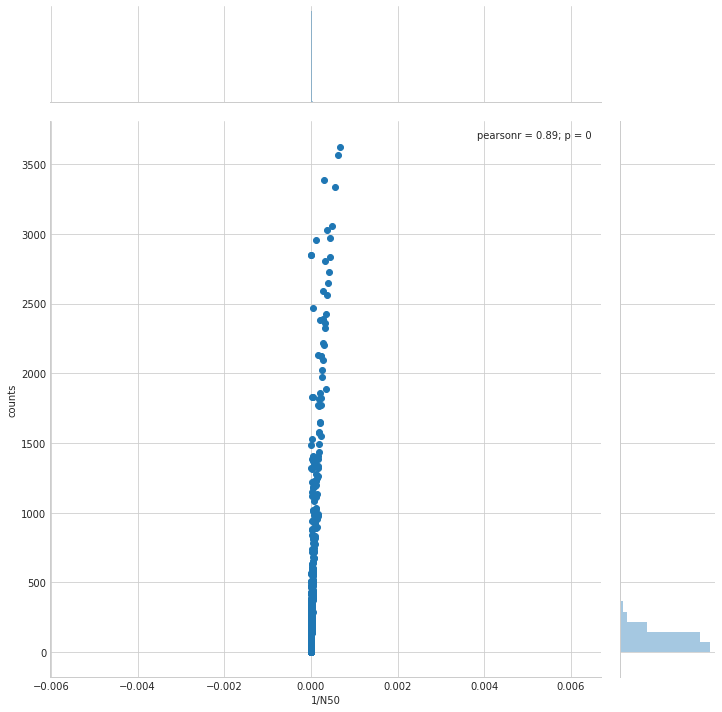

In [13]:
sns.jointplot(data=table, x="1/N50", y="counts", size=10)

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


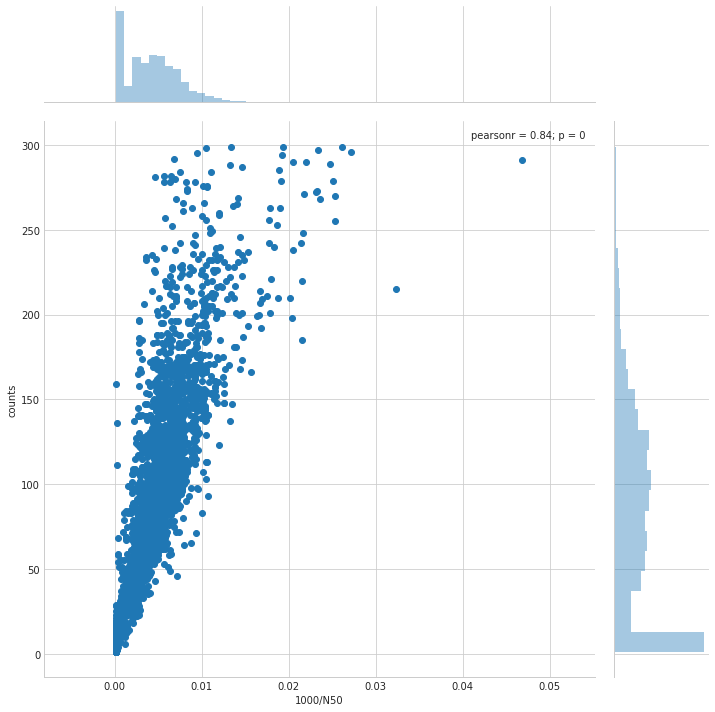

In [14]:
sns.jointplot(data=table[table["counts"] < 300], x="1000/N50", y="counts", size=10)

# comparison with serotypes

In [30]:
curated = table[(table["counts"] <= 300) & (table["N50"] >= 10 ** 5)]

In [31]:
curated.shape

(3222, 8)

# rule out plasmid only and contaminated

In [32]:
curated.index = [x[0:15] for x in curated["id"]]

# Combine metadata selection

In [18]:
metafile = "/media/NGS/Sequences/Klebsiella_pneumoniae/Klebsiella_pneumoniae.csv"
meta = pd.read_csv(metafile)
meta["Assembly"] = [x.strip() for x in meta["Assembly"]]
meta = meta[meta["GC%"] != "-"]
meta["GC%"] = list(map(lambda x: float(x), meta["GC%"]))

,#Organism/Name,Strain,CladeID,BioSample,BioProject,Group,SubGroup,Assembly,Size (Mb),GC%,Replicons,WGS,Scaffolds,Genes,Proteins,Release Date,Modify Date,Level,RefSeq FTP,GenBank FTP
0,Klebsiella pneumoniae subsp. pneumoniae HS11286,HS11286,19672,SAMN02602959,PRJNA78789,Proteobacteria,Gammaproteobacteria,GCA_000240185.2,5.68232,57.1373,chromosome:NC_016845.1/CP003200.1; plasmid pKP...,-,7,5867,5779,2011/12/21,2017/03/22,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
1,Klebsiella pneumoniae subsp. pneumoniae NTUH-K...,NTUH-K2044,19672,SAMD00060934,PRJDA21069,Proteobacteria,Gammaproteobacteria,GCA_000009885.1,5.47267,57.3928,chromosome:NC_012731.1/AP006725.1; plasmid pK2...,-,2,5417,5140,2005/01/06,2017/02/20,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
2,Klebsiella pneumoniae subsp. pneumoniae MGH 78578,ATCC 700721; MGH 78578,19672,SAMN02603941,PRJNA31,Proteobacteria,Gammaproteobacteria,GCA_000016305.1,5.69489,57.1666,chromosome:NC_009648.1/CP000647.1; plasmid pKP...,-,6,5716,5420,2007/07/05,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
3,Klebsiella pneumoniae 342,342,19672,SAMN02603449,PRJNA28471,Proteobacteria,Gammaproteobacteria,GCA_000019565.1,5.92026,56.8840,chromosome:NC_011283.1/CP000964.1; plasmid pKP...,-,3,5937,5626,2008/09/24,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
4,Klebsiella pneumoniae KCTC 2242,KCTC 2242,19672,SAMN02603582,PRJNA67293,Proteobacteria,Gammaproteobacteria,GCA_000220485.1,5.46242,57.3252,chromosome:NC_017540.1/CP002910.1; plasmid pKC...,-,2,5434,5155,2011/07/12,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
5,Klebsiella pneumoniae subsp. pneumoniae KPNIH10,KPNIH10,19672,SAMN01057614,PRJNA73843,Proteobacteria,Gammaproteobacteria,GCA_000281435.2,5.76782,57.1433,chromosome:NZ_CP007727.1/CP007727.1; plasmid p...,-,4,5908,5653,2014/05/27,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
6,Klebsiella pneumoniae subsp. pneumoniae KPNIH1,KPNIH1,19672,SAMN01057611,PRJNA73191,Proteobacteria,Gammaproteobacteria,GCA_000281535.2,5.76661,57.1432,chromosome:NZ_CP008827.1/CP008827.1; plasmid p...,-,4,5907,5654,2014/07/02,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
7,Klebsiella pneumoniae subsp. pneumoniae 1084,1084,19672,SAMN02603641,PRJNA167369,Proteobacteria,Gammaproteobacteria,GCA_000294365.1,5.38671,57.4000,chromosome:NC_018522.1/CP003785.1,-,1,5263,4963,2012/08/29,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
8,Klebsiella pneumoniae,ATCC BAA-2146,19672,SAMN02152539,PRJNA183901,Proteobacteria,Gammaproteobacteria,GCA_000364385.3,5.78150,56.9738,chromosome 1:NZ_CP006659.2/CP006659.2; plasmid...,-,5,5922,5645,2014/02/05,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...
9,Klebsiella pneumoniae 500_1420,500_1420,19672,SAMN02141993,PRJNA193167,Proteobacteria,Gammaproteobacteria,GCA_000406765.2,5.54764,57.2924,chromosome:NZ_CP011980.1/CP011980.1; plasmid p...,-,5,5653,5381,2015/07/23,2017/02/21,Complete Genome,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...


In [33]:
curated = pd.merge(curated, meta, left_index=True, right_on="Assembly")

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


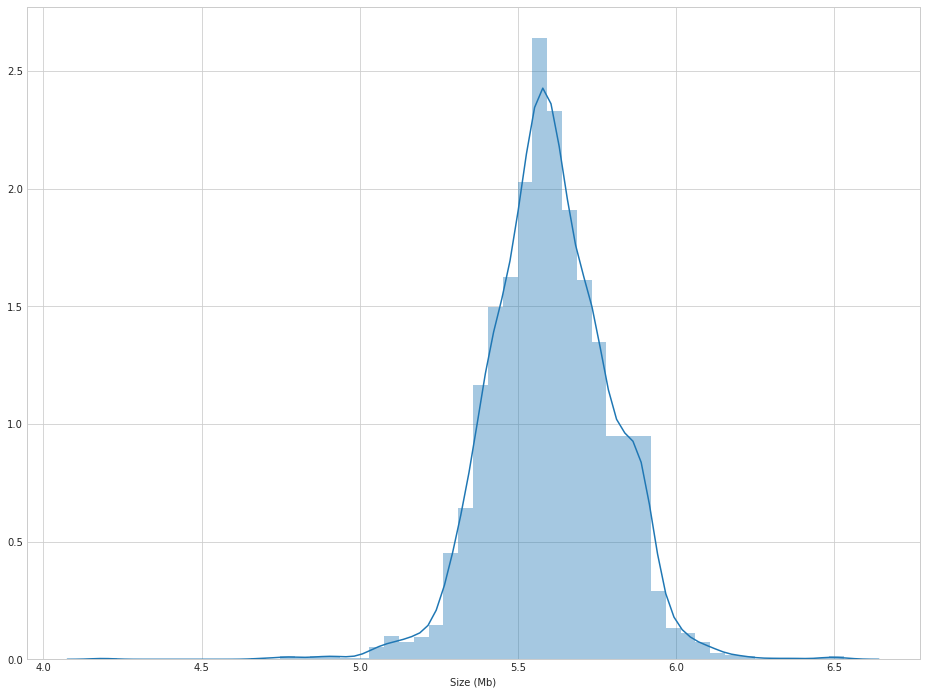

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
sns.distplot(curated["Size (Mb)"], ax=ax)
# fig.savefig("pics/Vibrio cholerae genome size distribution.png")

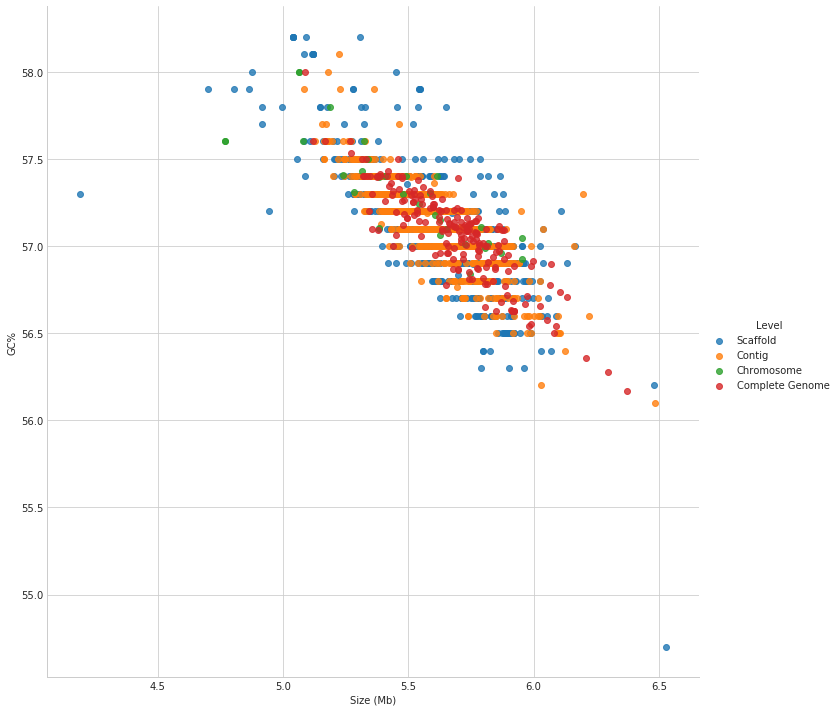

In [21]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="Level", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

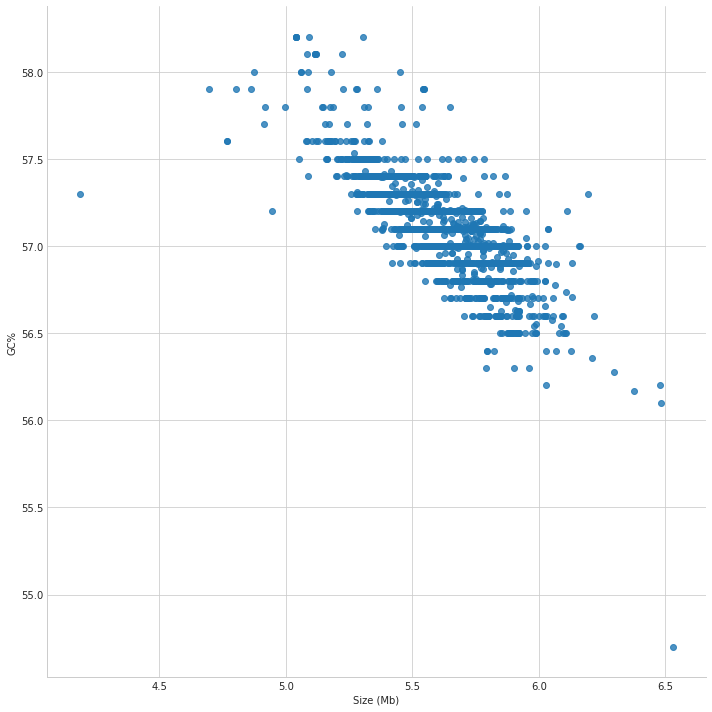

In [22]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", fit_reg=False, size=10)
# plt.savefig("pics/Vibrio cholerae genome size-GC content plot.png")

In [46]:
model = linear_model.HuberRegressor(epsilon=3.2)
model.fit(curated[["Size (Mb)"]].as_matrix(), list(curated["GC%"]))

HuberRegressor(alpha=0.0001, epsilon=3.2, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)

In [47]:
curated["y_mean"] = model.predict(curated[["Size (Mb)"]])
curated["corrected_y"] = curated["GC%"] - curated["y_mean"]
curated["outliers"] = model.outliers_

/home/chen1i6c04/jupyter_notebook/ven_jupyter/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


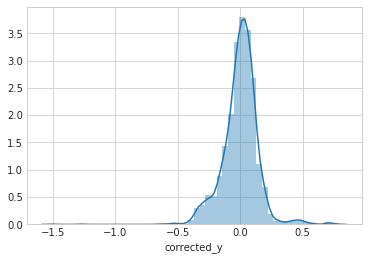

In [48]:
sns.distplot(curated["corrected_y"])

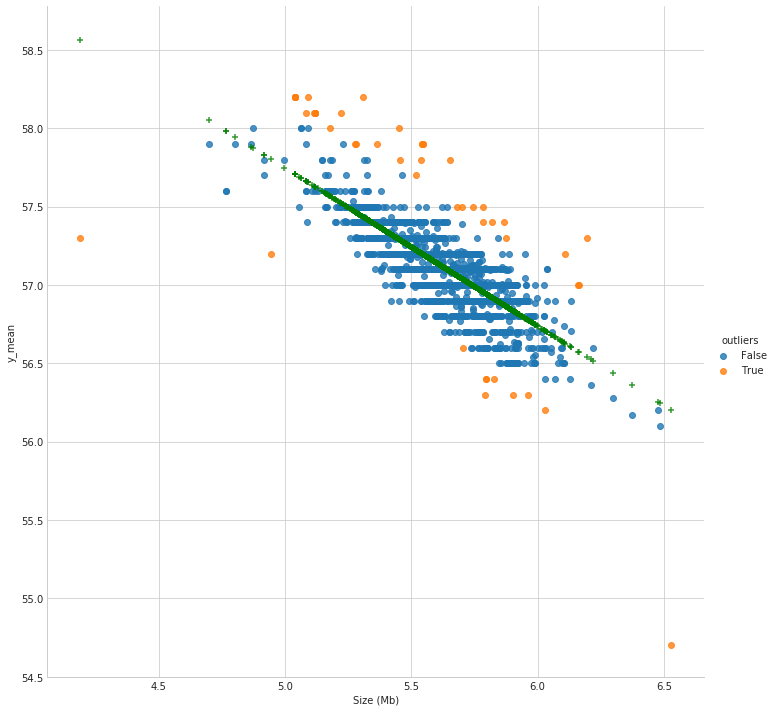

In [49]:
sns.lmplot(data=curated, x="Size (Mb)", y="GC%", hue="outliers", fit_reg=False, size=10)
sns.regplot(x="Size (Mb)", y="y_mean", data=curated, color="g", marker="+", fit_reg=False)
# plt.savefig("pics/Klebsiella pneumoniae genome size-GC content plot outliers.png")

In [50]:
curated = curated[~curated['outliers']]

In [51]:
curated.to_csv("results/Klebsiella_pneumoniae_data_clean.tsv", sep="\t", index=False)

# selection of clean dataset

In [52]:
dst = "/media/NGS/Sequences/Klebsiella_pneumoniae/NCBI_clean"
for file in curated["id"]:
    shutil.copyfile(os.path.join(path, file), os.path.join(dst, file))